# Accessing WorldPop API for beginners

In [34]:
import requests
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Define request fun
def get_api(url, record_path = "data"):
  response = requests.get(url)
  # Check if the request was successful (status code 200)
  if response.status_code == 200:
    data = response.json()  # If the response is in JSON format
    data = pd.json_normalize(data, record_path, max_level=1)
  else:
    print("Error:", response.status_code)
  return(data)

## Basic API calls
The [WorldPop REST API](https://www.worldpop.org/sdi/introapi/) facilitates the querying of the WorldPop database to GET information on data held on the database, along with accompanying metadata associated with the data.

### Get WorldPop available datasets

In [3]:
base_url = "https://www.worldpop.org/rest/data"
data = get_api(base_url)
data

alias                         name   
0                    pop            Population Counts  \
1                 births                       Births   
2            pregnancies                  Pregnancies   
3           urban_change                 Urban change   
4         age_structures       Age and sex structures   
5                   dahi       Development Indicators   
6      dependency_ratios            Dependency Ratios   
7   internal_migration_f              Migration Flows   
8        dynamic_mapping              Dynamic Mapping   
9     global_flight_data           Global Flight Data   
10            covariates                   Covariates   
11                  gbsg     Global Settlement Growth   
12  gridcellsurfaceareas      Grid-cell surface areas   
13            adminareas         Administrative Areas   
14           pop_density           Population Density   
15                   pwd  Population Weighted Density   

                                title   
0                   Population Counts  \
1                              Births   
2                         Pregnancies   
3                        Urban change   
4              Age and sex structures   
5   Development and Health Indicators   
6                   Dependency Ratios   
7                     Migration Flows   
8                     Dynamic Mapping   
9                  Global Flight Data   
10   Geospatial covariate data layers   
11     Global Built-Settlement Growth   
12            Grid-cell surface areas   
13               Administrative Areas   
14                 Population Density   
15        Population Weighted Density   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Get data levels for a specific dataset

In [4]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
# Get API data
url = f"{base_url}/{dalias}"
data = get_api(url)
data

,alias,name
0,pic,Individual countries
1,pop_continent,Whole Continent
2,wpgp,Unconstrained individual countries 2000-2020 ( 100m resolution )
3,wpgp1km,Unconstrained global mosaics 2000-2020 ( 1km resolution )
4,,WP00643
5,wpgpunadj,Unconstrained individual countries 2000-2020 UN adjusted ( 100m resolution )
6,wpic1km,Unconstrained individual countries 2000-2020 ( 1km resolution )
7,wpicuadj1km,Unconstrained individual countries 2000-2020 UN adjusted ( 1km resolution )
8,cic2020_100m,Constrained Individual countries 2020 ( 100m resolution )
9,cic2020_UNadj_100m,Constrained Individual countries 2020 UN adjusted (100m resolution)


### Get the Countries and Years

In [5]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
dlevel = "wpgp"
url = f"{base_url}/{dalias}/{dlevel}"
# Get API data
data = get_api(url)
data
# Filter for specific coutnry
print(sorted(set(data["iso3"])))
data[data["iso3"] == 'PHL']

['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BVT', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KOS', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL'

,id,title,popyear,iso3
19,1344,"The spatial distribution of population in 2000, Philippines",2000,PHL
268,1593,"The spatial distribution of population in 2001, Philippines",2001,PHL
517,1842,"The spatial distribution of population in 2002, Philippines",2002,PHL
766,2091,"The spatial distribution of population in 2003, Philippines",2003,PHL
1015,2340,"The spatial distribution of population in 2004, Philippines",2004,PHL
1264,2589,"The spatial distribution of population in 2005, Philippines",2005,PHL
1513,2838,"The spatial distribution of population in 2006, Philippines",2006,PHL
1762,3087,"The spatial distribution of population in 2007, Philippines",2007,PHL
2011,3336,"The spatial distribution of population in 2008, Philippines",2008,PHL
2252,3577,"The spatial distribution of population in 2009, Philippines",2009,PHL


### Get the data for selected Country/Year

In [6]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
dlevel = "wpgp"
country = "PHL" # iso3
url = f"{base_url}/{dalias}/{dlevel}?iso3={country}"
# Get data
data = get_api(url)
data
# Filter by year
data[data["popyear"] == '2020']

,id,title,desc,doi,date,popyear,citation,data_file,archive,public,...,category,gtype,continent,country,iso3,files,url_img,organisation,license,url_summary
20,6316,"The spatial distribution of population in 2020, Philippines","Estimated total number of people per grid-cell. The dataset is available to download in Geotiff format at a resolution of 3 arc (approximately 100m at the equator). The projection is Geographic Coordinate System, WGS84. The units are number of people per pixel. The mapping approach is Random Forest-based dasymetric redistribution.",10.5258/SOTON/WP00645,2018-11-01,2020,"WorldPop (www.worldpop.org - School of Geography and Environmental Science, University of Southampton; Department of Geography and Geosciences, University of Louisville; Departement de Geographie, Universite de Namur) and Center for International Earth Science Information Network (CIESIN), Columbia University (2018). Global High Resolution Population Denominators Project - Funded by The Bill and Melinda Gates Foundation (OPP1134076). https://dx.doi.org/10.5258/SOTON/WP00645",GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif,N,Y,...,Unconstrained individual countries 2000-2020 ( 100m resolution ),Population,Asia,Philippines,PHL,[https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif],https://hub.worldpop.org/tabs/gdata/img/6316/phl_ppp_wpgp_2020_Image.png,"WorldPop, University of Southampton, UK, hub.worldpop.org",https://hub.worldpop.org/data/licence.txt,https://hub.worldpop.org/geodata/summary?id=6316


# Get the data and do something

In [7]:
# Download the file
data_2020 = data[data["popyear"] == '2020']
data_file = data_2020["files"].to_string(index=False)
data_file

'[https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif]'

In [41]:
tiff_file_path = 'phl_ppp_2020.tif'
# Replace 'your_raster.tif' with the path to your TIFF file
raster_data = rasterio.open(tiff_file_path)
print(raster_data.bounds) # Bounding box for the raster
# Read data
raster = raster_data.read(1)
raster # We could replace the extreme < 0 values for -1

BoundingBox(left=116.927916214, bottom=4.586250183000001, right=126.605416175, top=21.070416784)


array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

C:\Users\Julian\AppData\Local\Temp\ipykernel_9372\78162664.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(raster+1), )


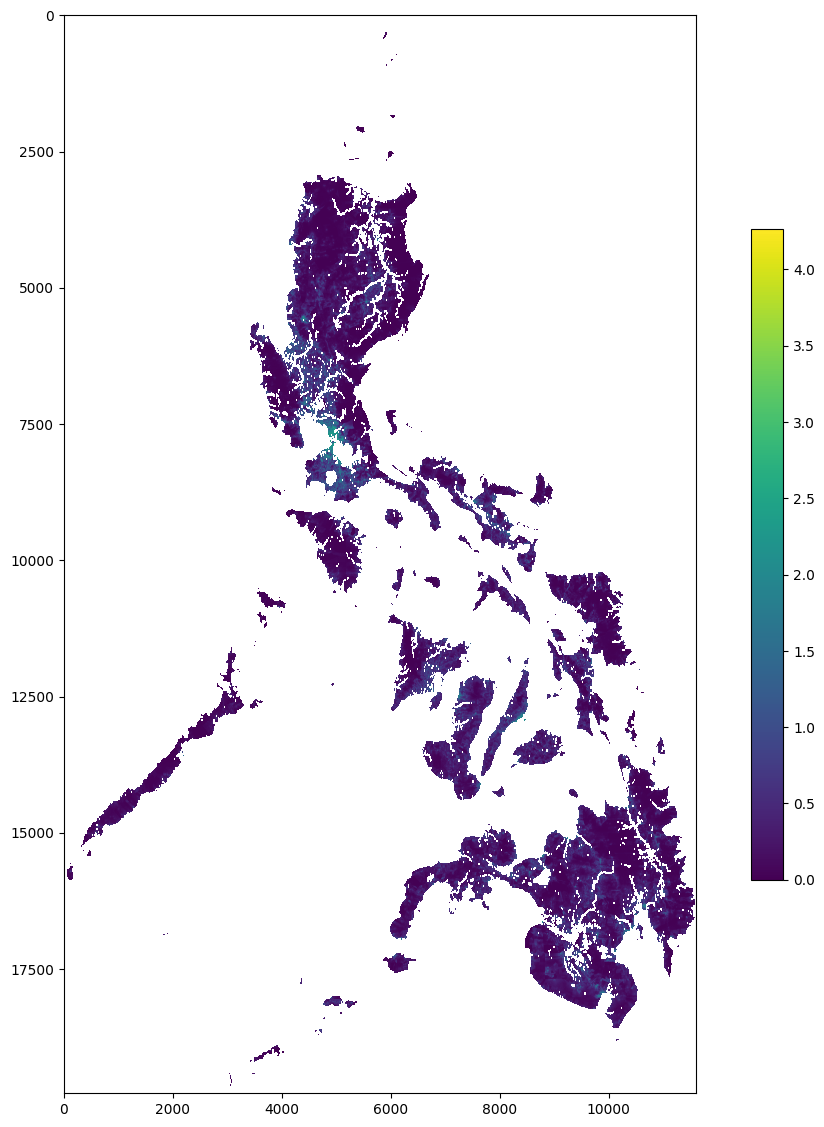

In [42]:
# Print a plot
plt.rcParams['figure.figsize'] = 14, 14 # Set image size
plt.imshow(np.log10(raster+1), )
bar = plt.colorbar(fraction=0.03) # Controls legend ratio to image

In [44]:
print(raster[raster>0].sum())

110194056.0


## Advance API calls

The (API)[https://www.worldpop.org/sdi/advancedapi/] allow you to request data WorldPop for a custom geographic area defined by a geojson. 

Currently contains two services which run on the servers: 'stats' and 'sample'. 'stats' is the primary service to return population totals. There are currently two datasets available in the API containing the total population from the WorldPop Global Project ('wpgppop') and the total population in age and sex categories ('wpgpas').

### Open a task 

In [64]:
# Define API params
base_url = "https://api.worldpop.org/v1/services"
service = "stats"
dataset = "wpgppop"
year = "2010"
# geo = json.load(open('phl_2017_poverty.geojson')) # Load custom geojson
geo = "{“type':'FeatureCollection','features':[{“type':'Feature','properties':{},'geometry':{“type':'Polygon','coordinates':[[[10.546875,47.62097541515849],[9.95361328125,46.437856895024204],[11.315917968749998,45.98169518512228],[12.63427734375,46.66451741754235],[12.65625,47.85740289465826],[10.546875,47.62097541515849]]]}}]}"
asyncro = "false" # Shoudl result be given straight away
url = f"{base_url}/{service}?dataset={dataset}&year={year}&geojson={geo}&runasync={asyncro}"
# Get data
data = get_api(url, record_path=None)
data

,status,status_code,error,error_message,taskid
0,finished,200,False,None,79a145a8-ef70-50a5-8728-c0f243ac06bf


### Monitor task status

In [65]:
# Define API params
task_url = "https://api.worldpop.org/v1/tasks"
task_id = data["taskid"].to_string(index=False)
task_url = f"{task_url}/{task_id}"
print(task_url)
# Get response
response = requests.get(task_url)
data_task = response.json()  # If the response is in JSON format
data_task

https://api.worldpop.org/v1/tasks/79a145a8-ef70-50a5-8728-c0f243ac06bf


{'status': 'finished',
 'error': True,
 'error_message': 'No User Description for this type of error: JSONDecodeError',
 'taskid': '79a145a8-ef70-50a5-8728-c0f243ac06bf',
 'startTime': '2023-08-26 11:12:53.251456',
 'endTime': '2023-08-26 11:12:54.25688',
 'executionTime': 1}